<a href="https://colab.research.google.com/github/bahing-rai/AI-Coursework/blob/main/AI_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    roc_curve, auc
)

#Loading and Preparing the Data

In [6]:
df = pd.read_csv('muse_v3.csv')

#Features to use

In [7]:
features = ['valence_tags', 'arousal_tags', 'dominance_tags', 'number_of_emotion_tags']

# Drop missing values

In [8]:
df_clean = df.dropna(subset=features + ['genre'])


# Filter for top 2 genres

In [9]:
top_2_genres = df_clean['genre'].value_counts().nlargest(2).index
df_top2 = df_clean[df_clean['genre'].isin(top_2_genres)].copy()

# Encode genre labels

In [10]:
label_encoder = LabelEncoder()
df_top2['genre'] = label_encoder.fit_transform(df_top2['genre'])

# Prepare feature matrix and target

In [11]:
X = df_top2[features]
y = df_top2['genre']

# Scale features

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Decision Tree Classifier

In [14]:
dt_model = DecisionTreeClassifier(max_depth=15, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

# Predict

In [15]:
y_pred = dt_model.predict(X_test)



# Evaluation: Classification Report

In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50        39
           1       0.74      0.76      0.75        76

    accuracy                           0.67       115
   macro avg       0.63      0.63      0.63       115
weighted avg       0.67      0.67      0.67       115



# Performance Metrics

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPerformance Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")


Performance Metrics:
Accuracy  : 0.6696
Precision : 0.6656
Recall    : 0.6696
F1 Score  : 0.6674


# Confusion Matrix


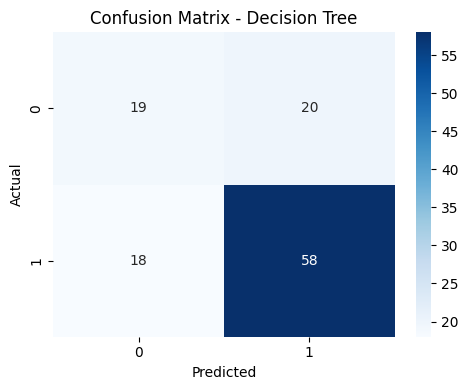

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#Feature Importance Chart

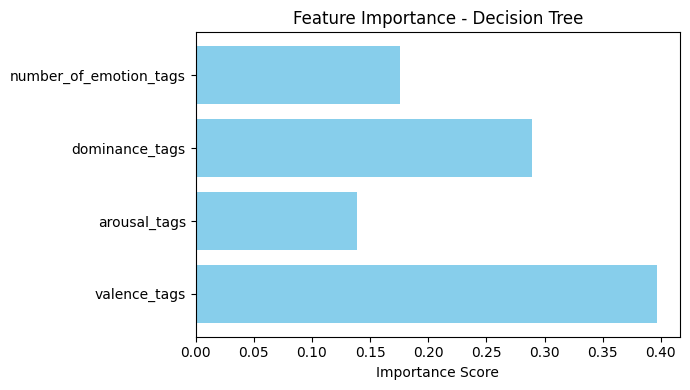

In [19]:
# Feature importance
importances = dt_model.feature_importances_
feature_names = features

# Plotting
plt.figure(figsize=(7, 4))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#ROC Curve

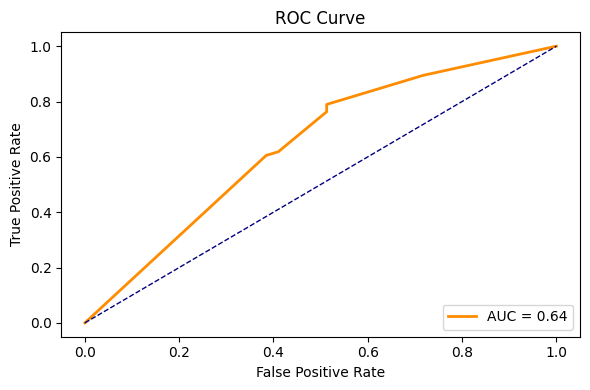

In [22]:
# Only works for binary classification
y_prob = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#Bar Chart Comparing Classification Metrics

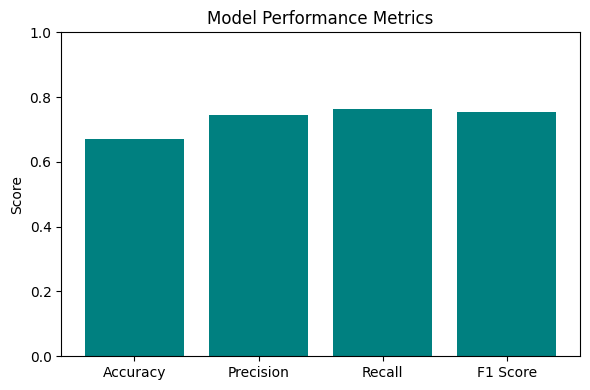

In [23]:
# Collect metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values(), color='teal')
plt.title("Model Performance Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()